In [42]:
import sys
import pandas
import matplotlib
import seaborn
import numpy as np
import sklearn

In [43]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
# Load the data

games = pandas.read_csv("/home/Desktop/games.csv")


In [6]:
# Print columns in games

print(games.columns)
print(games.shape)

Index(['id', 'type', 'name', 'yearpublished', 'minplayers', 'maxplayers',
       'playingtime', 'minplaytime', 'maxplaytime', 'minage', 'users_rated',
       'average_rating', 'bayes_average_rating', 'total_owners',
       'total_traders', 'total_wanters', 'total_wishers', 'total_comments',
       'total_weights', 'average_weight'],
      dtype='object')
(81312, 20)


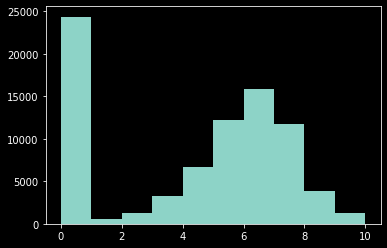

In [7]:
# Printing histogram of average_rating column 

plt.hist(games['average_rating'])
plt.show()

In [12]:
# Print games with rating zero

print(games[games['average_rating']==0].iloc[0])

# Print games with >0 rating

print(games[games['average_rating']>0].iloc[0   ])

id                             318
type                     boardgame
name                    Looney Leo
yearpublished                    0
minplayers                       0
maxplayers                       0
playingtime                      0
minplaytime                      0
maxplaytime                      0
minage                           0
users_rated                      0
average_rating                   0
bayes_average_rating             0
total_owners                     0
total_traders                    0
total_wanters                    0
total_wishers                    1
total_comments                   0
total_weights                    0
average_weight                   0
Name: 13048, dtype: object
id                                  12333
type                            boardgame
name                    Twilight Struggle
yearpublished                        2005
minplayers                              2
maxplayers                              2
playingtime          

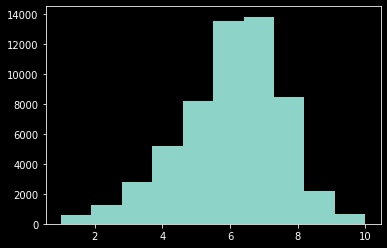

In [11]:
# Remove data with no user ratings and empty rows

games = games[games['average_rating']>0]

games = games.dropna(axis=0)

plt.hist(games['average_rating'])
plt.show()


In [5]:
# Print columns

print(games.columns)

Index(['id', 'type', 'name', 'yearpublished', 'minplayers', 'maxplayers',
       'playingtime', 'minplaytime', 'maxplaytime', 'minage', 'users_rated',
       'average_rating', 'bayes_average_rating', 'total_owners',
       'total_traders', 'total_wanters', 'total_wishers', 'total_comments',
       'total_weights', 'average_weight'],
      dtype='object')


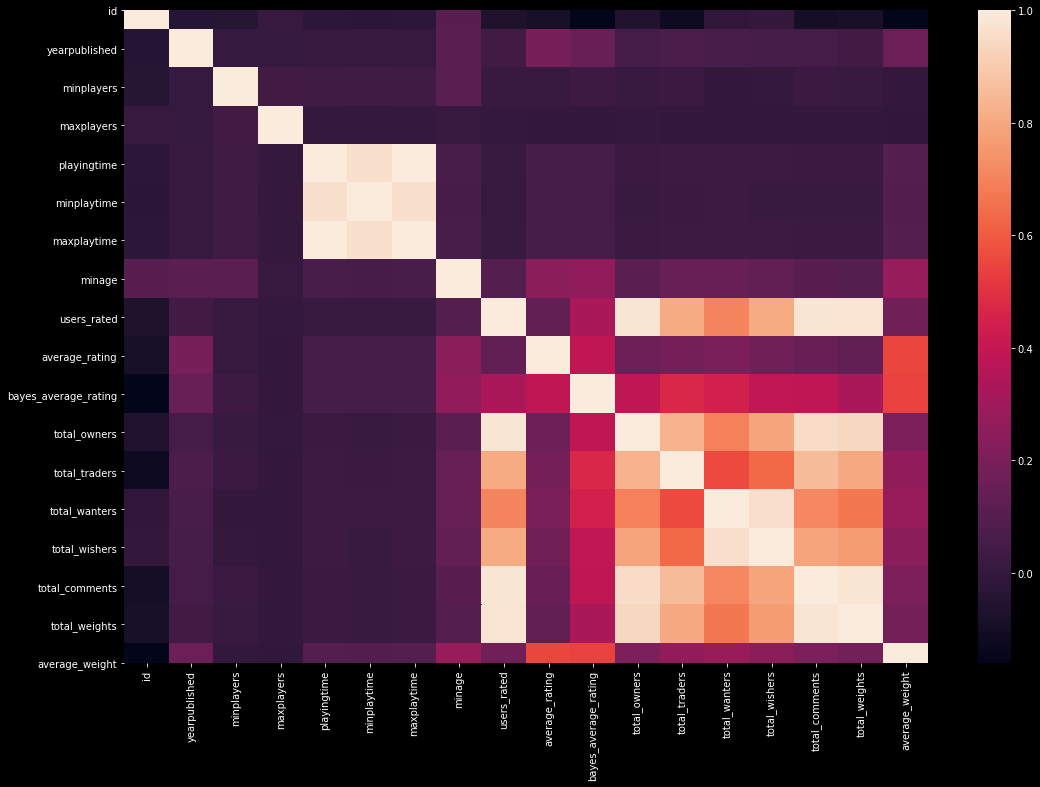

In [7]:
# Correlation matrix

corrmat = games.corr()
fig = plt.figure(figsize=(18,12))

sns.heatmap(corrmat)

plt.show()

In [17]:
# Removing unneccessary features

columns = games.columns.to_list()

columns = [c for c in columns if c not in ["average_rating","id","type","name","bayes_average_rating"]]

target = "average_rating"

print(columns)

['yearpublished', 'minplayers', 'maxplayers', 'playingtime', 'minplaytime', 'maxplaytime', 'minage', 'users_rated', 'total_owners', 'total_traders', 'total_wanters', 'total_wishers', 'total_comments', 'total_weights', 'average_weight']


In [24]:
# Generating and training datasets

train , test = train_test_split(games,test_size=0.2)
print(train.shape)
print(test.shape)


(45515, 20)
(11379, 20)


In [25]:
# Linear Regression model

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lr = LinearRegression()
lr.fit(train[columns],train[target])


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [59]:
# Making predictions 
pred = lr.predict(test[columns])
mean_squared_error(test[target],pred)

2.0932907044857965

In [60]:
# Training

from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100,min_samples_leaf=10,random_state=1)
rf.fit(train[columns],train[target])

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=10, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=1, verbose=0,
                      warm_start=False)

In [61]:
# Prediction

pred = rf.predict(test[columns])
print(mean_squared_error(pred,test[target]))

1.4431128774675368


In [62]:
# Comparing both
import numpy
#print(test[columns].iloc[10].values.reshape(1,-1))
pred_lr = lr.predict(test[columns].iloc[10].values.reshape(1,-1))
pred_rf = rf.predict(test[columns].iloc[10].values.reshape(1,-1))
print(pred_lr,pred_rf,test[target].iloc[10])

[5.77705827] [8.07021487] 8.25
